# Visualizations for Airline Profitability

![Airline Image](https://images.pexels.com/photos/46148/aircraft-jet-landing-cloud-46148.jpeg)

#### 1. **Correlation Heatmap**
A **correlation heatmap** can be used to identify correlations between features such as fuel efficiency, load factor, and maintenance downtime. This helps in understanding how these variables interact and affect profitability. Strong correlations between features indicate areas that might need more focus or optimization to enhance profitability.

#### 2. **Feature Importance Bar Chart**
The **feature importance bar chart** shows the relative importance of each feature in predicting profit, highlighting which factors contribute most to profitability. For example, features like load factor and fuel efficiency might emerge as critical drivers of profitability. This chart helps focus efforts on the key areas that will have the greatest impact on improving financial performance.

#### 3. **Profitability vs. Operational Metrics**
**Scatter plots** or **line graphs** can be used to examine how profitability changes with operational metrics like aircraft utilization, turnaround time, and flight delays. These visualizations show the relationships between these operational factors and profit, helping airlines identify areas for optimization.

#### 4. **Seasonal Trends**
**Line charts** can visualize seasonal fluctuations in profit, revenue, and operational efficiency. These charts allow airlines to plan for high and low seasons, adjusting operations and pricing strategies to maximize profitability during peak periods and minimize costs during slower times.



# Load Data

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/Bhawesh-Agrawal/NEURAL-NINJAS/refs/heads/main/Aviation_KPIs_Dataset.xlsx%20-%20Sheet1.csv")

In [4]:
df.head()

,Flight Number,Scheduled Departure Time,Actual Departure Time,Delay (Minutes),Aircraft Utilization (Hours/Day),Turnaround Time (Minutes),Load Factor (%),Fleet Availability (%),Maintenance Downtime (Hours),Fuel Efficiency (ASK),Revenue (USD),Operating Cost (USD),Net Profit Margin (%),Ancillary Revenue (USD),Debt-to-Equity Ratio,Revenue per ASK,Cost per ASK,Profit (USD)
0,FL885,2024-05-20 11:51:21,2024-07-10 02:38:54,50,12.36,115,79.18,96.24,9.21,4.15,10953.75,27847.59,17.90,1058.68,2.46,2639.46,6710.26,-16893.84
1,FL930,2024-01-23 06:56:23,2024-07-07 02:53:44,27,14.53,83,98.59,80.49,1.55,3.93,31597.25,1564.41,7.70,2941.32,2.89,8040.01,398.07,30032.84
2,FL478,2024-05-30 09:18:39,2024-12-05 01:00:54,108,10.73,87,67.44,97.90,2.06,4.26,13700.27,30494.88,5.84,1920.45,1.34,3216.03,7158.42,-16794.61
3,FL637,2024-08-15 05:21:47,2024-09-21 13:23:42,64,15.10,99,69.01,80.17,6.85,4.13,39913.01,13444.09,24.09,3167.79,0.60,9664.17,3255.23,26468.92
4,FL318,2024-07-25 15:29:58,2024-03-21 15:05:54,30,13.46,114,50.36,82.23,7.30,4.97,11531.48,34668.98,7.18,619.80,0.84,2320.22,6975.65,-23137.50


## Feature Engineering

In [95]:
#Copying the data
dm = df.copy()

In [96]:
# Convert the Scheduled and Actual Departure Time columns to datetime
dm['Scheduled Departure Time'] = pd.to_datetime(dm['Scheduled Departure Time'])
dm['Actual Departure Time'] = pd.to_datetime(dm['Scheduled Departure Time'])
# Extract month, year, and weekday from the 'Scheduled Departure Time' and 'Actual Departure Time'
dm['Scheduled_Month'] = dm['Scheduled Departure Time'].dt.month
dm['Scheduled_Year'] = dm['Scheduled Departure Time'].dt.year
dm['Scheduled_Weekday'] = dm['Scheduled Departure Time'].dt.weekday + 1  


dm['Actual_Departure_Time_Int'] = dm['Actual Departure Time'].dt.hour * 100 + dm['Actual Departure Time'].dt.minute



In [97]:
# Reaarranging the columns
dm =dm[['Scheduled_Month', 'Scheduled_Year',
       'Scheduled_Weekday','Actual_Departure_Time_Int','Delay (Minutes)', 'Aircraft Utilization (Hours/Day)',
       'Turnaround Time (Minutes)', 'Load Factor (%)',
       'Fleet Availability (%)', 'Maintenance Downtime (Hours)',
       'Fuel Efficiency (ASK)', 'Revenue (USD)', 'Operating Cost (USD)',
       'Net Profit Margin (%)', 'Ancillary Revenue (USD)',
       'Debt-to-Equity Ratio', 'Revenue per ASK', 'Cost per ASK',
       'Profit (USD)']]

In [98]:
dm.head(2)

,Scheduled_Month,Scheduled_Year,Scheduled_Weekday,Actual_Departure_Time_Int,Delay (Minutes),Aircraft Utilization (Hours/Day),Turnaround Time (Minutes),Load Factor (%),Fleet Availability (%),Maintenance Downtime (Hours),Fuel Efficiency (ASK),Revenue (USD),Operating Cost (USD),Net Profit Margin (%),Ancillary Revenue (USD),Debt-to-Equity Ratio,Revenue per ASK,Cost per ASK,Profit (USD)
0,5,2024,1,1151,50,12.36,115,79.18,96.24,9.21,4.15,10953.75,27847.59,17.9,1058.68,2.46,2639.46,6710.26,-16893.84
1,1,2024,2,656,27,14.53,83,98.59,80.49,1.55,3.93,31597.25,1564.41,7.7,2941.32,2.89,8040.01,398.07,30032.84


# EDA

### 1. Heatmap

<function matplotlib.pyplot.show(close=None, block=None)>

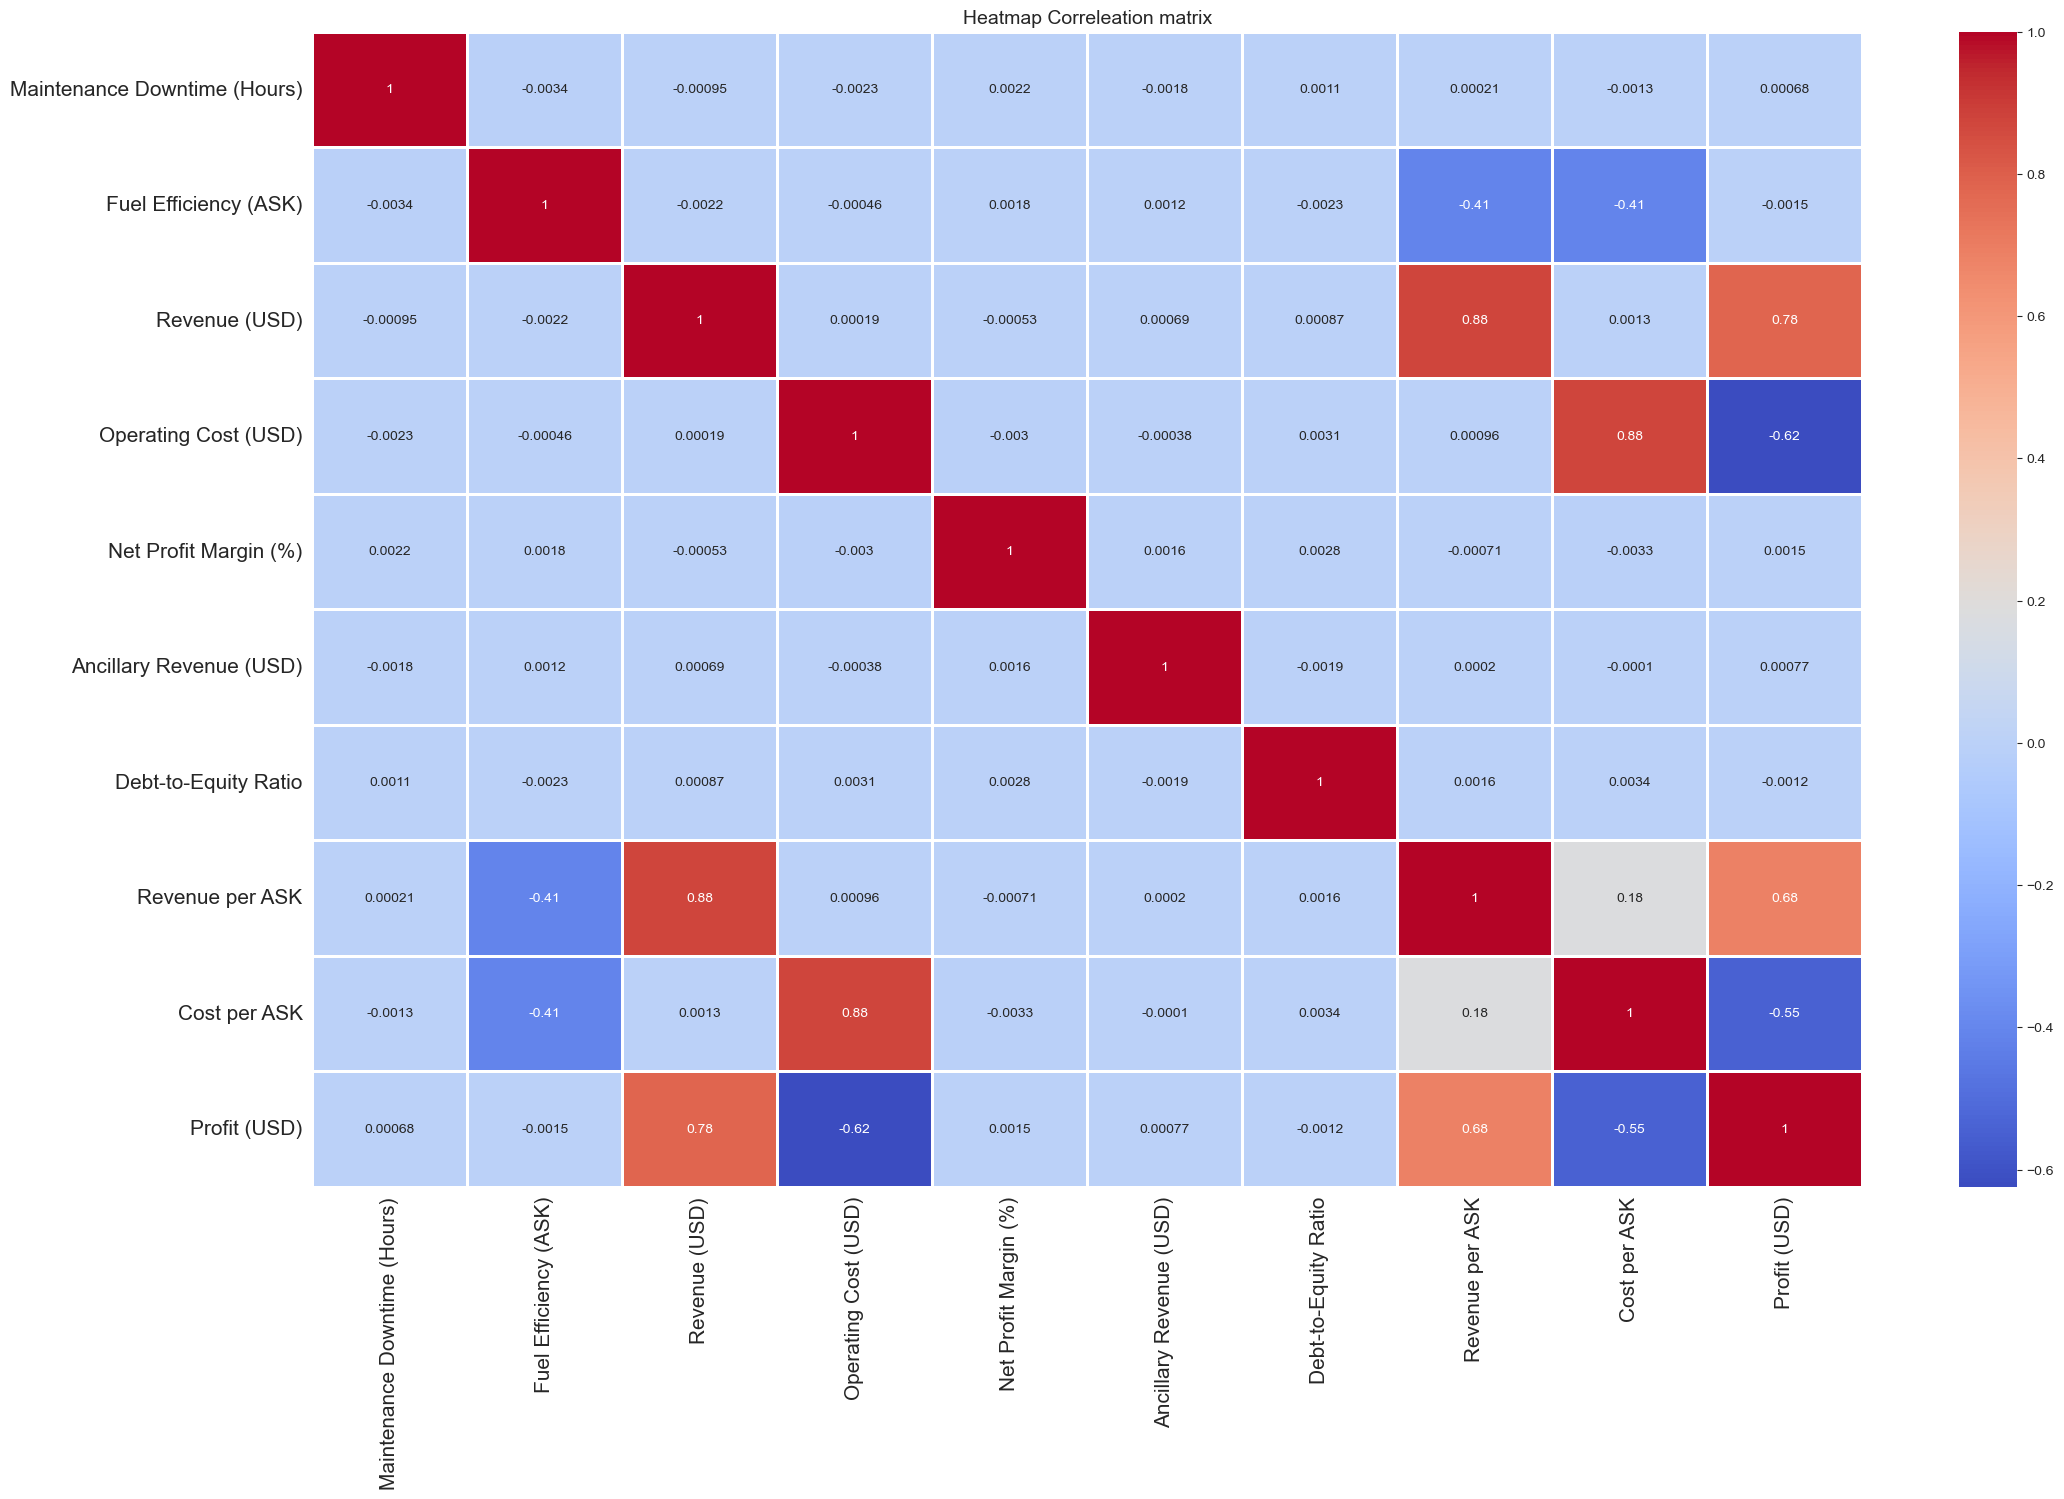

In [138]:
corr = dm.drop(columns=['Scheduled_Month', 'Scheduled_Year', 'Scheduled_Weekday',
       'Actual_Departure_Time_Int', 'Delay (Minutes)',
       'Aircraft Utilization (Hours/Day)', 'Turnaround Time (Minutes)',
       'Load Factor (%)', 'Fleet Availability (%)'],axis=0).corr()

# Heat-map plot
plt.figure(figsize=(25, 15))
plt.title("Heatmap Correleation matrix", fontsize=14)
sns.heatmap(corr,cmap = 'coolwarm',annot = True,linewidths=1, linecolor='white')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show

### 2. Feature Importance

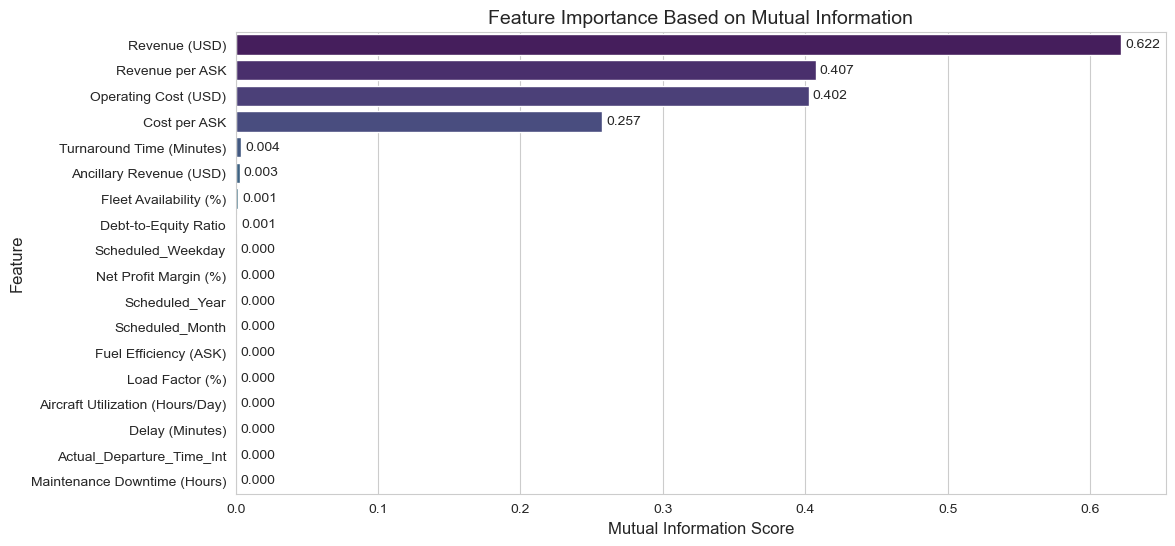

In [109]:
# Initializing X and y 
X = dm.drop(columns =['Profit (USD)'],axis=1)
y=dm['Profit (USD)']

# Calculating feature importance
from sklearn.feature_selection import mutual_info_regression

mutual_info = mutual_info_regression(X, y)

# Create a DataFrame to display the results
mutual_info_df = pd.DataFrame({
    'Feature': X.columns,
    'Mutual Information': mutual_info
})

# Sort by mutual information in descending order
mutual_info_df = mutual_info_df.sort_values(by='Mutual Information', ascending=False)

# Set figure size and style
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Create barplot
ax = sns.barplot(
    data=mutual_info_df,
    x="Mutual Information",
    y="Feature",
    palette="viridis",
    hue = "Feature"
)

# Add labels and title
plt.xlabel("Mutual Information Score", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.title("Feature Importance Based on Mutual Information", fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Show values on bars
for container in ax.containers:
    ax.bar_label(container, fmt="%.3f", fontsize=10, padding=3)

# Display the plot
plt.show()

### 3.Profitability vs Operational Matrics

#### Profit VS All Matrics

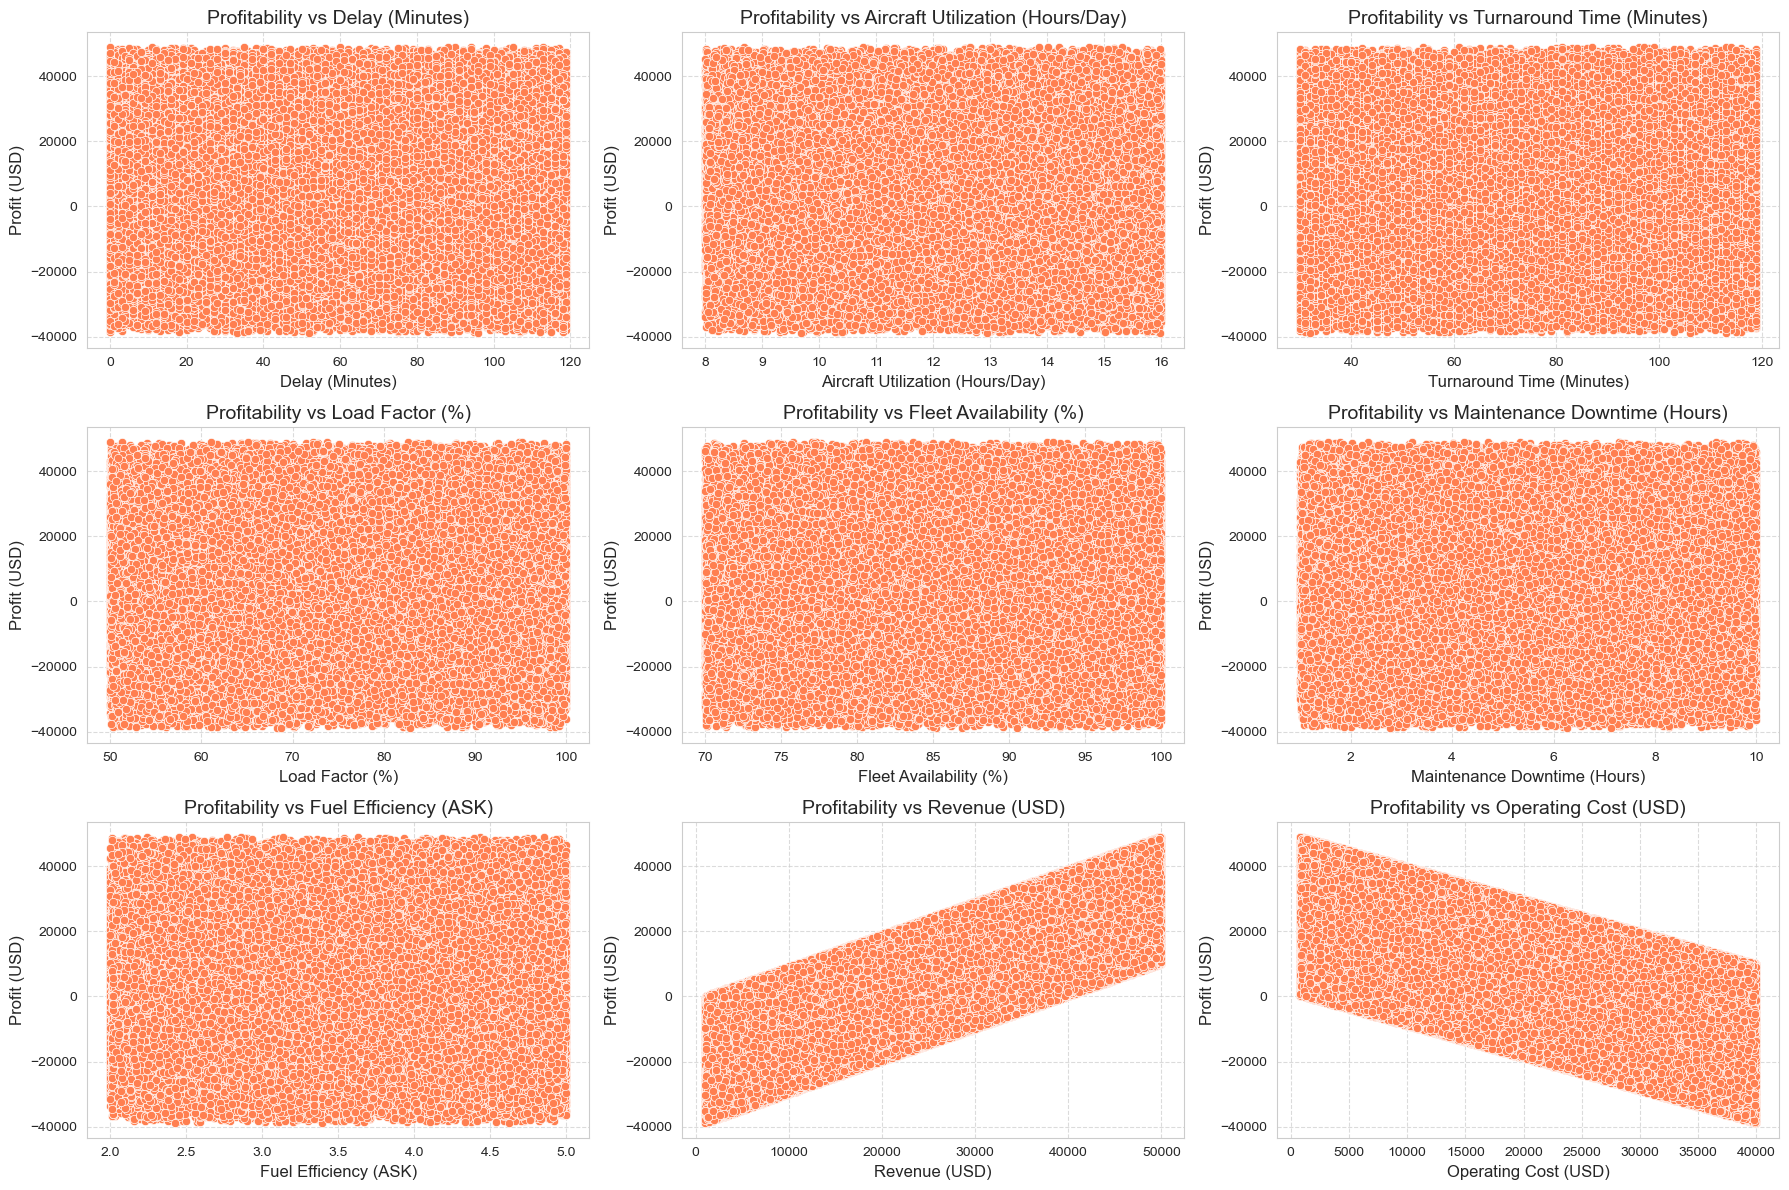

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a subset of relevant columns for plotting
operational_metrics = [
    'Delay (Minutes)', 'Aircraft Utilization (Hours/Day)', 'Turnaround Time (Minutes)', 
    'Load Factor (%)', 'Fleet Availability (%)', 'Maintenance Downtime (Hours)', 
    'Fuel Efficiency (ASK)', 'Revenue (USD)', 'Operating Cost (USD)'
]

# Set figure size and layout
plt.figure(figsize=(18, 12))

# Create subplots for each operational metric
for i, metric in enumerate(operational_metrics, 1):
    plt.subplot(3, 3, i)  # Creating a grid of 3x3 plots
    
    # Plot scatter plot between Profit (USD) and each operational metric
    sns.scatterplot(x=dm[metric], y=dm['Profit (USD)'], color='coral')
    
    # Set plot title and labels
    plt.title(f'Profitability vs {metric}', fontsize=14)
    plt.xlabel(f'{metric}', fontsize=12)
    plt.ylabel('Profit (USD)', fontsize=12)
    
    # Improve the x and y axis scales
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

    # Add a grid for better readability
    plt.grid(True, linestyle='--', alpha=0.7)

# Adjust layout to avoid overlapping
plt.tight_layout()
plt.show()


#### Profit vs Revenue and Operation Cost

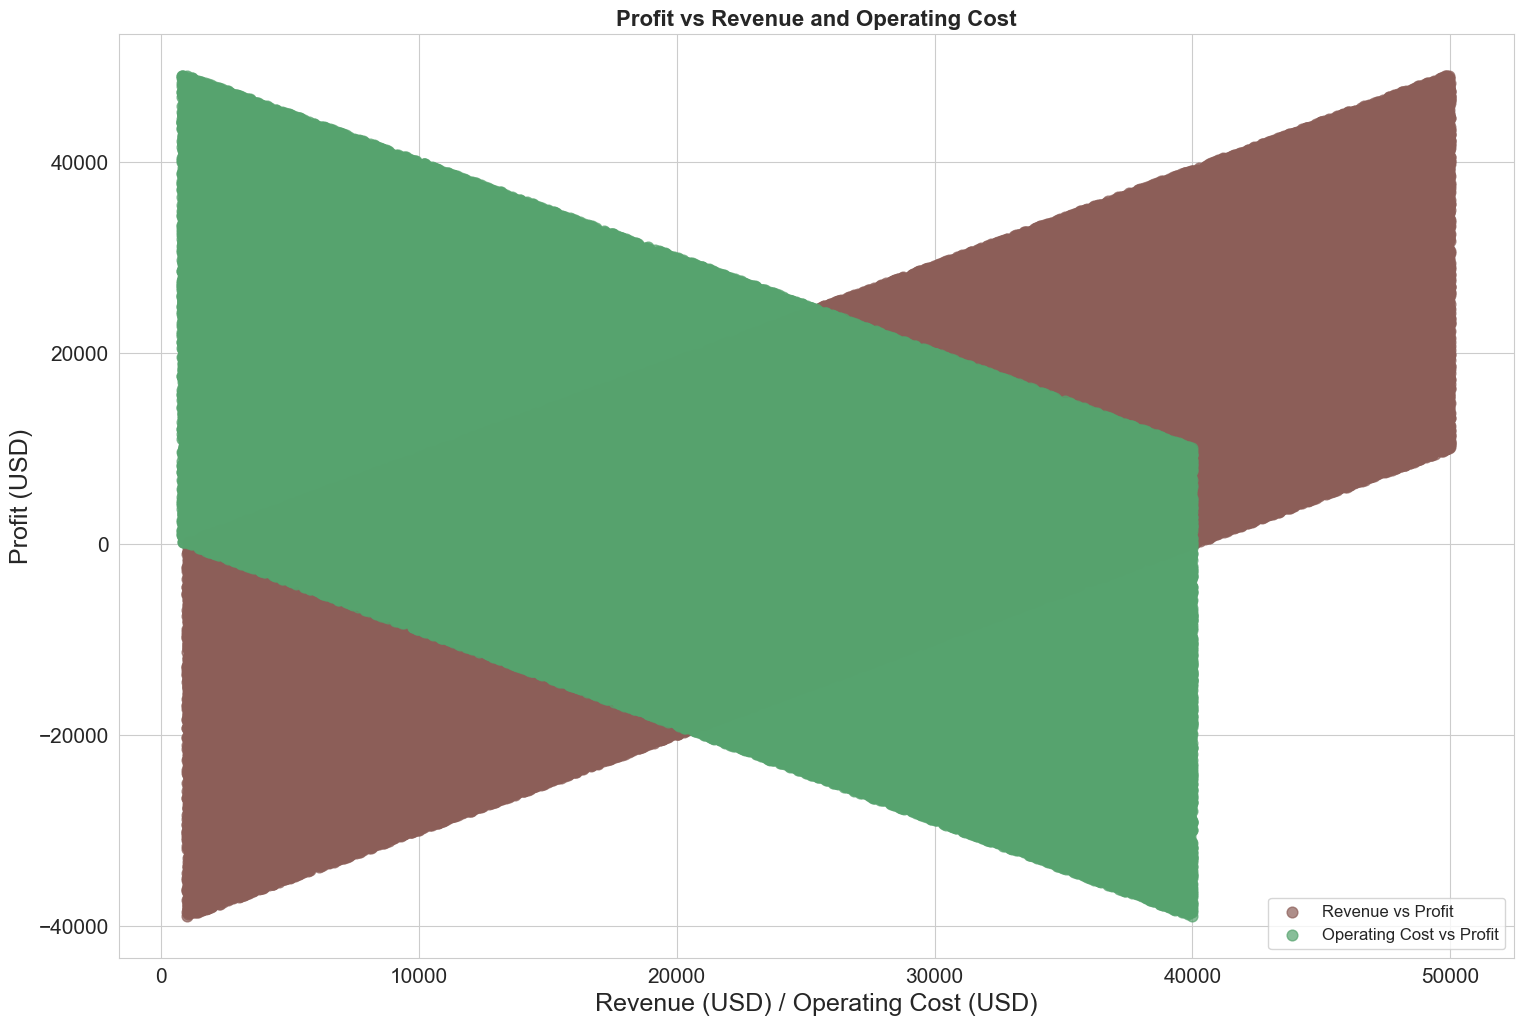

In [115]:
# Create a larger figure
plt.figure(figsize=(18, 12))

# Customize the scatter plot with new color choices and marker styles
plt.scatter(dp['Revenue (USD)'], dp['Profit (USD)'], alpha=0.7, color='#8C5E58', s=60, label='Revenue vs Profit')
plt.scatter(dp['Operating Cost (USD)'], dp['Profit (USD)'], alpha=0.7, color='#56A36E', s=60, label='Operating Cost vs Profit')

# Add title and labels with larger font size
plt.title('Profit vs Revenue and Operating Cost', fontsize=16, weight='bold')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Revenue (USD) / Operating Cost (USD)', fontsize=18)
plt.ylabel('Profit (USD)', fontsize=18)

# Display the legend with a larger font size and a cleaner position
plt.legend(fontsize=12, loc='lower right')

# Show the plot
plt.show()


### 3. Seasonal Trends

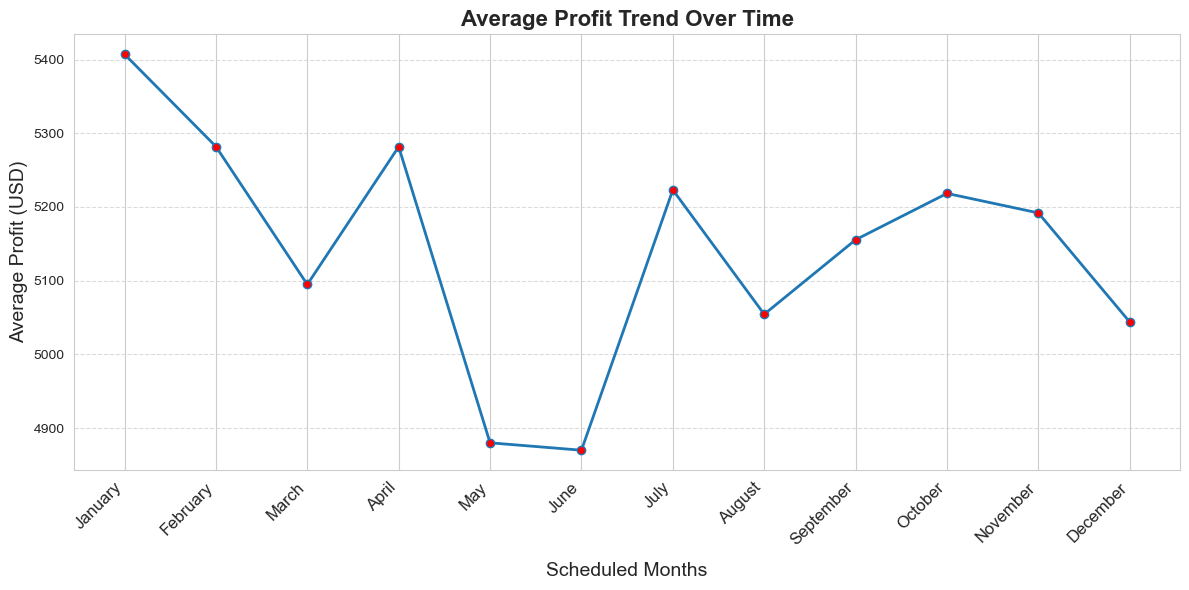

In [168]:
import matplotlib.pyplot as plt
import pandas as pd
month_names = [
    'January', 'February', 'March', 'April', 'May', 'June', 
    'July', 'August', 'September', 'October', 'November', 'December'
]
# Group data by Scheduled Weekday and calculate mean profit
profit_by_months = dm.groupby(['Scheduled_Month'])['Profit (USD)'].mean()

# Sort index to maintain weekday order
profit_by_months = profit_by_months.sort_index()

# Set the figure size
plt.figure(figsize=(12, 6))

# Plot the average profit trend over time
plt.plot(
    profit_by_months.index, 
    profit_by_months.values, 
    color='tab:blue', 
    linewidth=2, 
    marker='o', 
    markersize=6, 
    linestyle='-', 
    markerfacecolor='red'
)

# Set x-axis ticks properly to align with gridlines
plt.xticks(
    ticks=profit_by_months.index, 
    labels=month_names, 
    rotation=45, 
    ha='right', 
    fontsize=12
)

# Add title and labels with enhanced formatting
plt.title('Average Profit Trend Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Scheduled Months', fontsize=14, labelpad=10)
plt.ylabel('Average Profit (USD)', fontsize=14)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to prevent label overlap
plt.tight_layout()

# Show the plot
plt.show()


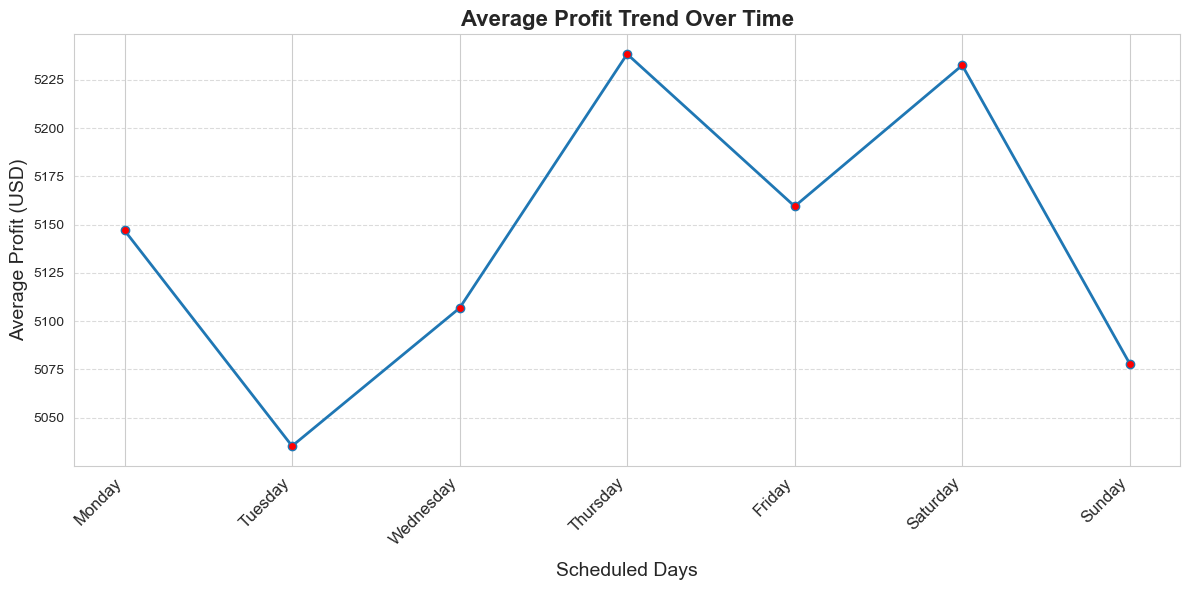

In [170]:
import matplotlib.pyplot as plt
import pandas as pd
weekdays = [
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 
    'Sunday']
# Group data by Scheduled Weekday and calculate mean profit
profit_by_days = dm.groupby(['Scheduled_Weekday'])['Profit (USD)'].mean()

# Sort index to maintain weekday order
profit_by_days = profit_by_days.sort_index()

# Set the figure size
plt.figure(figsize=(12, 6))

# Plot the average profit trend over time
plt.plot(
    profit_by_days.index, 
    profit_by_days.values, 
    color='tab:blue', 
    linewidth=2, 
    marker='o', 
    markersize=6, 
    linestyle='-', 
    markerfacecolor='red'
)

# Set x-axis ticks properly to align with gridlines
plt.xticks(
    ticks=profit_by_days.index, 
    labels=weekdays, 
    rotation=45, 
    ha='right', 
    fontsize=12
)

# Add title and labels with enhanced formatting
plt.title('Average Profit Trend Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Scheduled Days', fontsize=14, labelpad=10)
plt.ylabel('Average Profit (USD)', fontsize=14)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to prevent label overlap
plt.tight_layout()

# Show the plot
plt.show()
